## This notebook is developed as part of the Applied Data Science: Capstone Project. We analyse the Neighborhoods in London, focussing on the City of London.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium
# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries imported.')

Libraries imported.


In [2]:
# Read data from the URL provided
London_Boroughs = pd.read_html("https://en.wikipedia.org/wiki/List_of_London_boroughs") 

In [3]:
London_Boroughs[1]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1


In [4]:
London_Boroughs[0]

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [5]:
London_Boroughs[1]["Co-ordinates"]

0    51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
Name: Co-ordinates, dtype: object

In [6]:
def get_lat_lon_trial(coordinates):
    print("Coordinates received: ", coordinates)
    location = coordinates[28:]
    location = location.strip()
    Latitude = float(location[1:8])
    Longitude = float(location[11:17])
    if (location[18] == 'W'):
        Longitude *= -1
        return Latitude, Longitude
    return Latitude, Longitude

In [7]:
df_London_Boroughs = pd.DataFrame()
df_London_Boroughs = pd.concat([London_Boroughs[1], London_Boroughs[0]], ignore_index = True)

df_London_Boroughs.head(10)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population(2011 est),Co-ordinates,Nr. inmap,Population (2013 est)[1],Nr. in map
0,City of London,([note 5],Sui generis;City;Ceremonial county,Corporation of London;Inner Temple;Middle Temple,?,Guildhall,1.12,7000.0,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W,1.0,NaN,NaN
1,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,NaN,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,NaN,194352.0,25.0
2,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,NaN,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,NaN,369088.0,31.0
3,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,NaN,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,NaN,236687.0,23.0
4,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,NaN,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,NaN,317264.0,12.0
5,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,NaN,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,NaN,317899.0,20.0
6,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,NaN,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,NaN,229719.0,11.0
7,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,NaN,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,NaN,372752.0,19.0
8,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,NaN,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,NaN,342494.0,13.0
9,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,NaN,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,NaN,320524.0,30.0


In [8]:
df_London_Boroughs.columns

Index(['Borough', 'Inner', 'Status', 'Local authority', 'Political control',
       'Headquarters', 'Area (sq mi)', 'Population(2011 est)', 'Co-ordinates',
       'Nr. inmap', 'Population (2013 est)[1]', 'Nr. in map'],
      dtype='object')

In [9]:
df_London_Boroughs.drop(['Inner', 'Status','Political control', 'Headquarters', 'Area (sq mi)', 'Population(2011 est)', 'Nr. inmap', 'Population (2013 est)[1]', 'Nr. in map'], axis = 1, inplace = True)
df_London_Boroughs.head(5)

,Borough,Local authority,Co-ordinates
0,City of London,Corporation of London;Inner Temple;Middle Temple,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
1,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,Barnet London Borough Council,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,Bexley London Borough Council,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,Brent London Borough Council,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W


In [10]:
df_London_Boroughs.dropna(subset=["Co-ordinates"], axis = 0, inplace =True)
df_London_Boroughs.shape

(33, 3)

In [11]:
column_names = ['Borough','Latitude', 'Longitude', 'Co-ordinates'] 
df_Map_of_London = pd.DataFrame(columns=column_names)

In [12]:
def get_lat_lon(coordinates):
    coordinates = coordinates.split("/")
   # print("Coordinates received: ", coordinates.split("/"))
    location = coordinates[1][1:]
    #location = location.strip()
   # print("Location", location)
    Latitude = float(location[1:8])
    Longitude = float(location[11:17])
    if (location[18] == 'W'):
        Longitude *= -1
        return Latitude, Longitude
    return Latitude, Longitude

In [13]:
df_Map_of_London["Borough"] = df_London_Boroughs["Borough"]
df_Map_of_London["Co-ordinates"] = df_London_Boroughs["Co-ordinates"]
for index in df_Map_of_London.index:
    #print("Coordinates Sent :", df_Map_of_London["Co-ordinates"][index])
    df_Map_of_London["Latitude"][index], df_Map_of_London["Longitude"][index] = get_lat_lon(df_Map_of_London["Co-ordinates"][index])
df_Map_of_London.head()

,Borough,Latitude,Longitude,Co-ordinates
0,City of London,51.5155,-0.0922,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
1,Barking and Dagenham [note 1],51.5607,0.1557,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
2,Barnet,51.6252,-0.1517,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
3,Bexley,51.4549,0.1505,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
4,Brent,51.5588,-0.2817,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W


In [14]:
#Use geopy library to get the latitude and longitude values of London, UK

address = 'London, UK'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [15]:
# create map of London using latitude and longitude values
f = folium.Figure(width=800, height=400)
map_london = folium.Map(location=[latitude, longitude], zoom_start=11).add_to(f)

# add markers to map
for lat, lng, borough in zip(df_Map_of_London['Latitude'], df_Map_of_London['Longitude'],df_Map_of_London['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

It should be noted that the DataFrame used to develop the above map doesnt include the postcodes. As we getinto greater detail we zoom into City of London and City of Westminster. We need to remake a data frame that focuses just on these areas. We will require getting the postcode districts as well as latitide and longitude.

In [16]:
# identify the post codes that provide coverage for City of London and Westminster

postcodeEC = pd.read_html("https://en.wikipedia.org/wiki/EC_postcode_area")
postcodeWC = pd.read_html("https://en.wikipedia.org/wiki/WC_postcode_area")
postcodeE = pd.read_html("https://en.wikipedia.org/wiki/E_postcode_area")
postcodeSE = pd.read_html("https://en.wikipedia.org/wiki/SE_postcode_area")
postcodeNW = pd.read_html("https://en.wikipedia.org/wiki/NW_postcode_area")
postcodeSW = pd.read_html("https://en.wikipedia.org/wiki/SW_postcode_area")
postcodeW = pd.read_html("https://en.wikipedia.org/wiki/W_postcode_area")

In [17]:
df_CentralLondon = pd.DataFrame()
df_CentralLondon = pd.concat([postcodeEC[1], postcodeWC[1], postcodeE[1], postcodeSE[1], postcodeNW[1], postcodeSW[1], postcodeW[1]], ignore_index = True)

df_CentralLondon.head(10)

,Postcode district,Post town,Coverage,Local authority area
0,EC1A,LONDON,St Bartholomew's Hospital,"City of London, Islington"
1,EC1M,LONDON,"Clerkenwell, Farringdon","Islington, Camden, City of London"
2,EC1N,LONDON,Hatton Garden,"Camden, City of London"
3,EC1P,LONDON,NaN,non-geographic
4,EC1R,LONDON,"Finsbury, Finsbury Estate (west)","Islington, Camden"
5,EC1V,LONDON,"Finsbury (east), Moorfields Eye Hospital","Islington, Hackney"
6,EC1Y,LONDON,"St Luke's, Bunhill Fields","Islington, City of London"
7,EC2A,LONDON,Shoreditch,"Islington, Hackney, City of London"
8,EC2M,LONDON,"Broadgate, Liverpool Street",Tower Hamlets
9,EC2N,LONDON,"Old Broad Street, Tower 42",City of London


In [18]:
df_CentralLondon.dropna(subset = ['Coverage'], axis=0, inplace=True)
df_CentralLondon.shape

(153, 4)

In [19]:
# Setup the final result data frame in the right format
column_names = ['Postcode', 'Borough','Neighborhood']

df_London_Westminster = pd.DataFrame(columns=column_names)
df_London_Westminster

,Postcode,Borough,Neighborhood


In [20]:
# Populate the database
df_London_Westminster['Postcode'] = df_CentralLondon['Postcode district']
df_London_Westminster['Borough'] = df_CentralLondon['Local authority area']
df_London_Westminster['Neighborhood'] = df_CentralLondon['Coverage']
df_London_Westminster.head(5)

,Postcode,Borough,Neighborhood
0,EC1A,"City of London, Islington",St Bartholomew's Hospital
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon"
2,EC1N,"Camden, City of London",Hatton Garden
4,EC1R,"Islington, Camden","Finsbury, Finsbury Estate (west)"
5,EC1V,"Islington, Hackney","Finsbury (east), Moorfields Eye Hospital"


In [21]:
print("Having processed the data as required, the shape of the DataFrame is ", df_London_Westminster.shape)

Having processed the data as required, the shape of the DataFrame is  (153, 3)


In [22]:
# Adding columns to read Latutute and Longitute
df_London_Westminster.insert(3 , 'Latitute', np.nan)
df_London_Westminster.insert(4 , 'Longitute', np.nan)
df_London_Westminster.head(5)

,Postcode,Borough,Neighborhood,Latitute,Longitute
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,NaN,NaN
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",NaN,NaN
2,EC1N,"Camden, City of London",Hatton Garden,NaN,NaN
4,EC1R,"Islington, Camden","Finsbury, Finsbury Estate (west)",NaN,NaN
5,EC1V,"Islington, Hackney","Finsbury (east), Moorfields Eye Hospital",NaN,NaN


In [23]:
df_London_Westminster_temp = df_London_Westminster[df_London_Westminster['Borough'].str.contains(("City of London"), na=False)].reset_index(drop=True)
df_London_Westminster_temp.shape

#df_London_Westminster.shape


(24, 5)

In [24]:
df_London_Westminster_temp_1 = df_London_Westminster[df_London_Westminster['Borough'].str.contains(("Westminster"), na=False)].reset_index(drop=True)
df_London_Westminster_temp_1.shape

(35, 5)

In [25]:
df_London_Westminster = pd.concat([df_London_Westminster_temp, df_London_Westminster_temp_1], axis = 0)

df_London_Westminster.shape

(59, 5)

In [26]:
df_London_Westminster.head(10)

,Postcode,Borough,Neighborhood,Latitute,Longitute
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,NaN,NaN
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",NaN,NaN
2,EC1N,"Camden, City of London",Hatton Garden,NaN,NaN
3,EC1Y,"Islington, City of London","St Luke's, Bunhill Fields",NaN,NaN
4,EC2A,"Islington, Hackney, City of London",Shoreditch,NaN,NaN
5,EC2N,City of London,"Old Broad Street, Tower 42",NaN,NaN
6,EC2R,City of London,Bank of England,NaN,NaN
7,EC2V,City of London,Guildhall,NaN,NaN
8,EC2Y,City of London,Barbican,NaN,NaN
9,EC3A,City of London,"St Mary Axe, Aldgate",NaN,NaN


In [27]:
# Having searched for various websites and tried out various API's and even geocoder I wasnt able to get latitude and 
# Longitute of london post. So I had to manualy search them and enter them.

df_London_Westminster.to_csv(r"london_postcode.csv", index = False, header = True)

In [28]:
df_City_Lon_West = pd.read_csv("Lon_West_Postcodes_v1.csv")
df_City_Lon_West.head()

,Postcode,Borough,Neighborhood,Latitute,Longitute
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,51.5183,-0.0991
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",51.5209,-0.1006
2,EC1N,"Camden, City of London",Hatton Garden,51.5196,-0.1079
3,EC1Y,"Islington, City of London","St Luke's, Bunhill Fields",51.5235,-0.0903
4,EC2A,"Islington, Hackney, City of London",Shoreditch,51.5242,-0.0807


In [29]:
# check shape of the lat_long data frame just read, to make sure its as expected
df_City_Lon_West.shape

(59, 5)

In [30]:
address = 'London, UK'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of City of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of City of London are 51.5073219, -0.1276474.


In [31]:
# create map of City of London using latitude and longitude values
f = folium.Figure(width=800, height=400)
map_city_of_london = folium.Map(location=[latitude, longitude], zoom_start=11).add_to(f)

# add markers to map
for lat, lng, label in zip(df_City_Lon_West['Latitute'], df_City_Lon_West['Longitute'], df_City_Lon_West['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city_of_london)  
    
map_city_of_london

## 2. Search the Neighborhoods in City of London and City of Westminster for specific services

In [32]:
CATEGORY_ID_LIST = [
    '4e67e38e036454776db1fb3a', # Residence
    '4bf58dd8d48988d104941735', # Medical Centre
    '5745c2e4498e11e7bccabdbd', # Drugstore
    '4bf58dd8d48988d10f951735', # Pharmacy
    '4f4533804b9074f6e4fb0105', # Elementary School
    '4bf58dd8d48988d13d941735', # High School
    '4f4533814b9074f6e4fb0107', # Nursery School
    '52e81612bcbc57f1066b7a45', # Preschool
    '52e81612bcbc57f1066b7a46', # Private School
    '4d4b7104d754a06370d81259', # Art and Entertainment
#    '4bf58dd8d48988d17f941735', # Movie Theater
#    '4bf58dd8d48988d1e5931735', # Music Venue
#    '4bf58dd8d48988d1f2931735', # Performing Arts Venue
    '52f2ab2ebcbc57f1066b8b4f' # Bus Stop
    '4bf58dd8d48988d1fc931735' # Light Rail Station
    '4bf58dd8d48988d1fd931735' # Metro Station
    '4bf58dd8d48988d129951735' # Train Station
    '52f2ab2ebcbc57f1066b8b51' # Tram Station
    '4bf58dd8d48988d103951735' # Clothing Store
    '4d954b0ea243a5684a65b473' # Convenience Store
    '4bf58dd8d48988d1f9941735', # Food & Drink Shop
    '4bf58dd8d48988d11d941735', # Sports Bar
    '4bf58dd8d48988d11b941735', # Pub
    '4d4b7105d754a06376d81259', # Nightlife Spot
    '4bf58dd8d48988d11f941735', # Nightclub
    '53e510b7498ebcb1801b55d4', # Night Market
    '4bf58dd8d48988d121941735', # Lounge
    '4d4b7105d754a06377d81259', # Outdoors & Recreation
#    '4bf58dd8d48988d175941735', # Gym / Fitness Center
#    '4bf58dd8d48988d163941735', # Park
#    '4bf58dd8d48988d1e7941735', # Playground
    '5744ccdfe4b0c0459246b4c7', # Child Care Service
    '54541900498ea6ccd0202697', # Health & Beauty Service
    '52f2ab2ebcbc57f1066b8b33', # Laundromat
    '4bf58dd8d48988d1fc941735', # Laundry Service
    '4bf58dd8d48988d1fd941735', # Shopping Mall
    '5744ccdfe4b0c0459246b4dc'  # Shopping Plaza
    ]

In [33]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'F1AJUU1UFHUIEB202G545SYM1XW0VMFJWBJODFLWLT2KILTG' # your Foursquare ID
CLIENT_SECRET = '1HFZHUCGQMPT21FECK2I2VCOC4ZPJO5WO50LEII1PTKGVFCJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F1AJUU1UFHUIEB202G545SYM1XW0VMFJWBJODFLWLT2KILTG
CLIENT_SECRET:1HFZHUCGQMPT21FECK2I2VCOC4ZPJO5WO50LEII1PTKGVFCJ


In [34]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&category_id={}&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CATEGORY_ID_LIST,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()['response']['venues']
         
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [35]:
# type your answer here

city_of_london_venues = getNearbyVenues(names=df_City_Lon_West['Neighborhood'],
                                   latitudes=df_City_Lon_West['Latitute'],
                                   longitudes=df_City_Lon_West['Longitute']
                                  )

St Bartholomew's Hospital
Clerkenwell, Farringdon
Hatton Garden
St Luke's, Bunhill Fields
Shoreditch
Old Broad Street, Tower 42
Bank of England
Guildhall
Barbican
St Mary Axe, Aldgate
Lloyd's of London, Fenchurch Street
Tower Hill, Tower of London
Monument, Billingsgate
Cornhill, Gracechurch Street, Lombard Street
Fetter Lane
St Paul's
Mansion House
Cannon Street
Blackfriars
Temple
High Holborn
Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane
Whitechapel, Spitalfields, Shadwell, Limehouse, Stepney, Portsoken
Bankside, South Bank, Southwark
Fetter Lane
Temple
Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane
Drury Lane, Kingsway, Aldwych
Covent Garden
Leicester Square, St. Giles
Charing Cross
Somerset House, Temple (west)
Euston, Regent's Park, Baker Street, Camden Town, Somers Town
Kilburn, Brondesbury, West Hampstead, Queen's Park
St John's Wood, Primrose Hill (south), Marylebone (north), Lisson Grove (north)
Whitehall, Buckingham Palace, the Houses of Parliamen

In [36]:
print(city_of_london_venues.shape)
city_of_london_venues.head()

(5690, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St Bartholomew's Hospital,51.5183,-0.0991,Stem + Glory,51.518270,-0.098611,"[{'id': '4bf58dd8d48988d1d3941735', 'name': 'V..."
1,St Bartholomew's Hospital,51.5183,-0.0991,Butchers' Hall,51.518233,-0.098782,"[{'id': '4bf58dd8d48988d171941735', 'name': 'E..."
2,St Bartholomew's Hospital,51.5183,-0.0991,KGV Building,51.517103,-0.099292,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H..."
3,St Bartholomew's Hospital,51.5183,-0.0991,Sir William Wallace Memorial,51.518387,-0.100421,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H..."
4,St Bartholomew's Hospital,51.5183,-0.0991,St Bartholomew's Hospital,51.517863,-0.099607,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H..."


In [37]:
# Let's check how many venues were returned for each neighborhood
city_of_london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
All but the west of St James's,100,100,100,100,100,100
Bank of England,100,100,100,100,100,100
"Bankside, South Bank, Southwark",100,100,100,100,100,100
Barbican,65,65,65,65,65,65
"Between Vauxhall Bridge, Grosvenor Bridge and Victoria Station, includes Pimlico",91,91,91,91,91,91
Blackfriars,94,94,94,94,94,94
"Broadway, Queen Anne's Gate and Old Queen Street",100,100,100,100,100,100
Cannon Street,99,99,99,99,99,99
Charing Cross,100,100,100,100,100,100


In [38]:
#We need to reformat city_of_london_venues.['Venue Category'] as its not in the right format
temp_category = pd.DataFrame(list(city_of_london_venues['Venue Category'].values)) 

category_name = list()

for index in temp_category.index:
    temp = temp_category[0][index]
    if temp is None:
        category_name.append(np.nan)
    else:    
        temp_name = temp['name']
        category_name.append(''.join(list(temp_name)))

In [39]:
city_of_london_venues['Venue Category'] = category_name    

city_of_london_venues.head(25)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St Bartholomew's Hospital,51.5183,-0.0991,Stem + Glory,51.518270,-0.098611,Vegetarian / Vegan Restaurant
1,St Bartholomew's Hospital,51.5183,-0.0991,Butchers' Hall,51.518233,-0.098782,Event Space
2,St Bartholomew's Hospital,51.5183,-0.0991,KGV Building,51.517103,-0.099292,Hospital
3,St Bartholomew's Hospital,51.5183,-0.0991,Sir William Wallace Memorial,51.518387,-0.100421,Historic Site
4,St Bartholomew's Hospital,51.5183,-0.0991,St Bartholomew's Hospital,51.517863,-0.099607,Hospital
5,St Bartholomew's Hospital,51.5183,-0.0991,"The Square, St. Bartholomew's Hospital",51.517258,-0.099563,Plaza
6,St Bartholomew's Hospital,51.5183,-0.0991,Half Cup,51.518015,-0.098654,Café
7,St Bartholomew's Hospital,51.5183,-0.0991,LINO,51.518102,-0.098956,Restaurant
8,St Bartholomew's Hospital,51.5183,-0.0991,PureGym,51.517294,-0.098379,Gym / Fitness Center
9,St Bartholomew's Hospital,51.5183,-0.0991,Citizens Advice,51.517742,-0.097617,Non-Profit


In [40]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(city_of_london_venues['Venue Category'].unique())))

There are 412 uniques categories.


In [41]:
# Analyse each neighborhood
# one hot encoding
city_of_london_venues_onehot = pd.get_dummies(city_of_london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
city_of_london_venues_onehot['Neighborhood'] = city_of_london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [city_of_london_venues_onehot.columns[-1]] + list(city_of_london_venues_onehot.columns[:-1])
city_of_london_venues_onehot = city_of_london_venues_onehot[fixed_columns]

city_of_london_venues_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auditorium,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Camera Store,Campaign Office,Campground,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Caucasian Restaurant,Cemetery,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Classroom,College Engineering Building,College Gym,College Lab,College Library,College Quad,College Residence Hall,College Science Building,College Stadium,College Technology Building,College Theater,Colombian Restaurant,Comedy Club,Comic Shop,Community Center,Concert Hall,Conference Room,Construction & Landscaping,Convenience Store,Convention Center,Corporate Amenity,Corporate Cafeteria,Corporate Coffee Shop,Cosmetics Shop,Country Dance Club,Courthouse,Coworking Space,Credit Union,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Doctor's Office,Donut Shop,Driving School,Dry Cleaner,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,English Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Fast Food Restaurant,Film Studio,Financial or Legal Service,Fire Station,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Frame Store,Fraternity House,French Restaurant,Fried Chicken Joint,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hookah Bar,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Language School,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Law School,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Medical Lab,Medical Supply Store,Mediterranean Restaurant,Meeting Room,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle 

In [42]:
# let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

city_of_london_venues_grouped = city_of_london_venues_onehot.groupby('Neighborhood').mean().reset_index()
city_of_london_venues_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Art Studio,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auditorium,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Ballroom,Bank,Bar,Basketball Court,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Belgian Restaurant,Betting Shop,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Center,Business Service,Butcher,Cafeteria,Café,Camera Store,Campaign Office,Campground,Canal,Candy Store,Cantonese Restaurant,Capitol Building,Car Wash,Caribbean Restaurant,Carpet Store,Casino,Castle,Caucasian Restaurant,Cemetery,Chaat Place,Champagne Bar,Cheese Shop,Chinese Restaurant,Chiropractor,Chocolate Shop,Church,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College & University,College Academic Building,College Administrative Building,College Arts Building,College Auditorium,College Bookstore,College Cafeteria,College Classroom,College Engineering Building,College Gym,College Lab,College Library,College Quad,College Residence Hall,College Science Building,College Stadium,College Technology Building,College Theater,Colombian Restaurant,Comedy Club,Comic Shop,Community Center,Concert Hall,Conference Room,Construction & Landscaping,Convenience Store,Convention Center,Corporate Amenity,Corporate Cafeteria,Corporate Coffee Shop,Cosmetics Shop,Country Dance Club,Courthouse,Coworking Space,Credit Union,Creperie,Cupcake Shop,Currency Exchange,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Distribution Center,Doctor's Office,Donut Shop,Driving School,Dry Cleaner,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,English Restaurant,Entertainment Service,Event Service,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Fast Food Restaurant,Film Studio,Financial or Legal Service,Fire Station,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Forest,Fountain,Frame Store,Fraternity House,French Restaurant,Fried Chicken Joint,Funeral Home,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General College & University,General Entertainment,General Travel,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hookah Bar,Hospital,Hospital Ward,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Insurance Office,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Lake,Language School,Laser Tag,Latin American Restaurant,Laundromat,Laundry Service,Law School,Lawyer,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Maternity Clinic,Mattress Store,Medical Center,Medical Lab,Medical Supply Store,Mediterranean Restaurant,Meeting Room,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle 

In [43]:
city_of_london_venues_grouped.shape

(55, 412)

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = city_of_london_venues_grouped['Neighborhood']

for ind in np.arange(city_of_london_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(city_of_london_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,All but the west of St James's,Office,Building,Italian Restaurant,Tech Startup,Gym / Fitness Center,Clothing Store,Spa,Bar,Sandwich Place,Restaurant
1,Bank of England,Office,Building,Coffee Shop,Café,Bank,Salon / Barbershop,Restaurant,Dentist's Office,Tech Startup,Doctor's Office
2,"Bankside, South Bank, Southwark",Office,Food Truck,General College & University,Salon / Barbershop,Bus Stop,Gym / Fitness Center,Building,Indian Restaurant,Coffee Shop,Café
3,Barbican,Event Space,Office,Conference Room,Residential Building (Apartment / Condo),Bar,Italian Restaurant,Gym,Performing Arts Venue,University,General Entertainment
4,"Between Vauxhall Bridge, Grosvenor Bridge and ...",Office,Bus Stop,Residential Building (Apartment / Condo),Bus Line,Coffee Shop,Fast Food Restaurant,Tech Startup,Bank,Theater,Italian Restaurant


In [46]:
# Run k-means to cluster the neighborhood into 5 clusters.

# set number of clusters
kclusters = 5

city_of_london_venues_grouped_clustering = city_of_london_venues_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(city_of_london_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [47]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

city_of_london_venues_merged = df_City_Lon_West

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
city_of_london_venues_merged = city_of_london_venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

city_of_london_venues_merged.head() # check the last columns!

,Postcode,Borough,Neighborhood,Latitute,Longitute,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EC1A,"City of London, Islington",St Bartholomew's Hospital,51.5183,-0.0991,0,Office,Building,Non-Profit,Residential Building (Apartment / Condo),Restaurant,Café,Event Space,Pub,College Academic Building,Coffee Shop
1,EC1M,"Islington, Camden, City of London","Clerkenwell, Farringdon",51.5209,-0.1006,1,Office,Tech Startup,Building,Café,Design Studio,French Restaurant,Cocktail Bar,Medical Center,Event Space,Business Center
2,EC1N,"Camden, City of London",Hatton Garden,51.5196,-0.1079,3,Jewelry Store,Office,Tech Startup,Building,Film Studio,Coffee Shop,Coworking Space,Food Truck,Whisky Bar,Café
3,EC1Y,"Islington, City of London","St Luke's, Bunhill Fields",51.5235,-0.0903,1,Office,Tech Startup,Building,Residential Building (Apartment / Condo),Park,Spa,General College & University,Government Building,Non-Profit,Coworking Space
4,EC2A,"Islington, Hackney, City of London",Shoreditch,51.5242,-0.0807,0,Office,Tech Startup,Pub,Indian Restaurant,Building,Coworking Space,Art Gallery,Parking,Café,Event Space


In [48]:
# create map
f = folium.Figure(width=800, height=400)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11).add_to(f)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(city_of_london_venues_merged['Latitute'], city_of_london_venues_merged['Longitute'], city_of_london_venues_merged['Neighborhood'], city_of_london_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [49]:
# Cluster 1

city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 0, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,St Bartholomew's Hospital,0,Office,Building,Non-Profit,Residential Building (Apartment / Condo),Restaurant,Café,Event Space,Pub,College Academic Building,Coffee Shop
4,Shoreditch,0,Office,Tech Startup,Pub,Indian Restaurant,Building,Coworking Space,Art Gallery,Parking,Café,Event Space
8,Barbican,0,Event Space,Office,Conference Room,Residential Building (Apartment / Condo),Bar,Italian Restaurant,Gym,Performing Arts Venue,University,General Entertainment
11,"Tower Hill, Tower of London",0,Office,Bus Stop,Park,Pub,Gym / Fitness Center,Coffee Shop,Building,Hotel,Parking,College Academic Building
16,Mansion House,0,Office,Coffee Shop,Bank,Wine Bar,Restaurant,Hotel,Platform,Salad Place,Asian Restaurant,Doctor's Office
23,"Bankside, South Bank, Southwark",0,Office,Food Truck,General College & University,Salon / Barbershop,Bus Stop,Gym / Fitness Center,Building,Indian Restaurant,Coffee Shop,Café
28,Covent Garden,0,Office,Building,Dance Studio,Clothing Store,Residential Building (Apartment / Condo),Coffee Shop,Indian Restaurant,Bridge,Italian Restaurant,Deli / Bodega
30,Charing Cross,0,Office,Italian Restaurant,Platform,Conference Room,Tech Startup,Theater,Cocktail Bar,Pizza Place,Coffee Shop,Fish & Chips Shop
31,"Somerset House, Temple (west)",0,Office,Pub,Hotel,Bar,Coffee Shop,Hotel Bar,Seafood Restaurant,Tech Startup,Gym / Fitness Center,Sandwich Place
32,"Euston, Regent's Park, Baker Street, Camden To...",0,Office,Bus Stop,Hospital,Residential Building (Apartment / Condo),Coffee Shop,Advertising Agency,Café,Bar,Pub,Music Venue


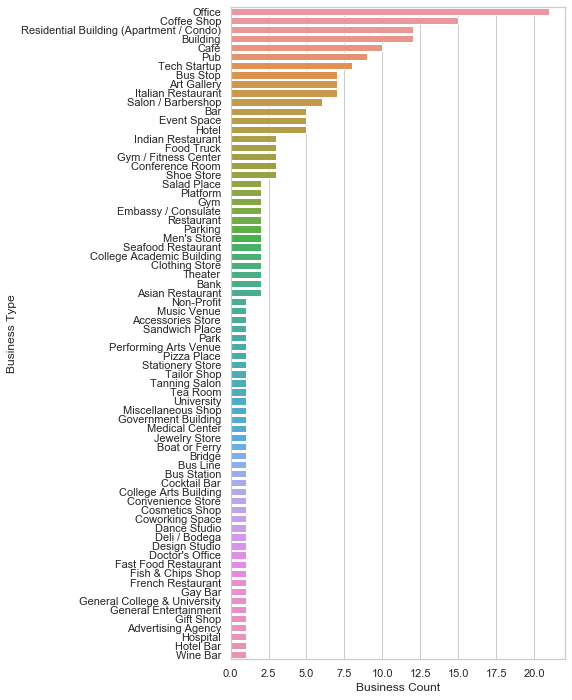

In [50]:
Cluster_1 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 0, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_1_count = pd.DataFrame(columns = columnNames)
Cluster_1_count['Business Type'] = pd.concat([Cluster_1['1st Most Common Venue'], Cluster_1['2nd Most Common Venue'], Cluster_1['3rd Most Common Venue'],
                                             Cluster_1['4th Most Common Venue'], Cluster_1['5th Most Common Venue'], Cluster_1['6th Most Common Venue'], 
                                             Cluster_1['7th Most Common Venue'], Cluster_1['8th Most Common Venue'], Cluster_1['9th Most Common Venue'], 
                                              Cluster_1['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_1_count['Business Count'] = 1
Cluster_1_count.shape


Cluster_1_count = Cluster_1_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_1_count = Cluster_1_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_1_count)


In [51]:
fig = ax.get_figure()

fig.savefig("LW_Search_Cluster_1.png", bbox_inches = 'tight')

In [52]:
LW_Search_Cluster_1 = set(Cluster_1['Neighborhood'])
print("Neighborhoods in Cluster 1 are: ", LW_Search_Cluster_1)

Neighborhoods in Cluster 1 are:  {'Mayfair (east), Hanover Square, Savile Row, Royal Academy', 'Tower Hill, Tower of London', "Broadway, Queen Anne's Gate and Old Queen Street ", 'Mansion House', 'Mayfair (north), Grosvenor Square', "St Bartholomew's Hospital", 'Shoreditch', 'Paddington, Bayswater, Hyde Park, Westbourne Green, Little Venice (part), Notting Hill (part)', 'Between Vauxhall Bridge, Grosvenor Bridge and Victoria Station, includes Pimlico', 'Marylebone', 'Charing Cross', 'Notting Hill, Ladbroke Grove (south), Holland Park (part)', 'Soho (north west)', 'Bankside, South Bank, Southwark', 'Barbican', 'Somerset House, Temple (west)', "Euston, Regent's Park, Baker Street, Camden Town, Somers Town", 'Great Portland Street, Fitzrovia', 'Harley Street', 'Covent Garden'}


In [53]:
# Cluster 2
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 1, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Clerkenwell, Farringdon",1,Office,Tech Startup,Building,Café,Design Studio,French Restaurant,Cocktail Bar,Medical Center,Event Space,Business Center
3,"St Luke's, Bunhill Fields",1,Office,Tech Startup,Building,Residential Building (Apartment / Condo),Park,Spa,General College & University,Government Building,Non-Profit,Coworking Space
5,"Old Broad Street, Tower 42",1,Office,Salon / Barbershop,Sushi Restaurant,Bar,Sandwich Place,Building,Cocktail Bar,Coworking Space,Bank,Bus Stop
6,Bank of England,1,Office,Building,Coffee Shop,Café,Bank,Salon / Barbershop,Restaurant,Dentist's Office,Tech Startup,Doctor's Office
7,Guildhall,1,Office,Building,Sandwich Place,Coffee Shop,Bar,Café,Library,General Travel,Museum,Pub
9,"St Mary Axe, Aldgate",1,Office,Sandwich Place,Bar,Cocktail Bar,Café,Other Great Outdoors,Outdoor Sculpture,Pub,IT Services,Recruiting Agency
10,"Lloyd's of London, Fenchurch Street",1,Office,Building,Pub,Sandwich Place,Café,Coffee Shop,Bank,Salad Place,Business Service,Restaurant
14,Fetter Lane,1,Office,Coffee Shop,Coworking Space,Event Space,Bookstore,Building,Church,Cocktail Bar,Restaurant,Medical Center
17,Cannon Street,1,Office,Platform,Tech Startup,Bar,Building,Coffee Shop,Bakery,Bank,Medical Center,Convention Center
18,Blackfriars,1,Office,Building,Church,Bridge,Residential Building (Apartment / Condo),Bus Stop,Gym / Fitness Center,Bar,Pub,Coffee Shop


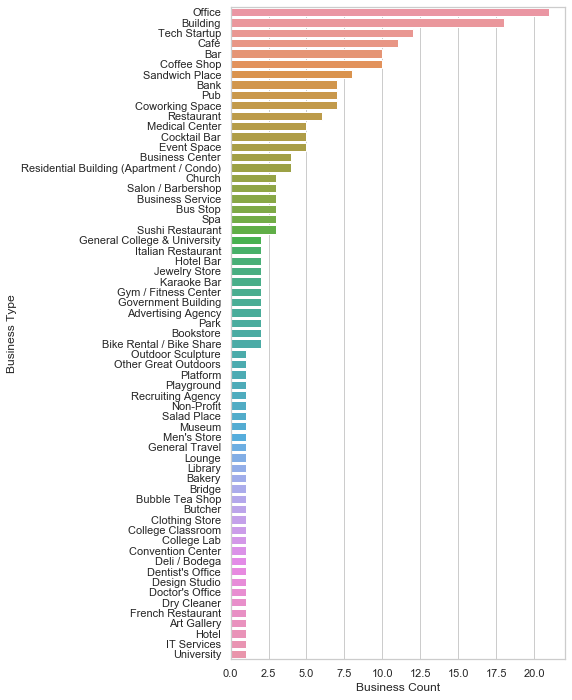

In [54]:
Cluster_2 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 1, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_2_count = pd.DataFrame(columns = columnNames)
Cluster_2_count['Business Type'] = pd.concat([Cluster_2['1st Most Common Venue'], Cluster_2['2nd Most Common Venue'], Cluster_2['3rd Most Common Venue'],
                                             Cluster_2['4th Most Common Venue'], Cluster_2['5th Most Common Venue'], Cluster_2['6th Most Common Venue'], 
                                             Cluster_2['7th Most Common Venue'], Cluster_2['8th Most Common Venue'], Cluster_2['9th Most Common Venue'], 
                                              Cluster_2['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_2_count['Business Count'] = 1
Cluster_2_count.shape


Cluster_2_count = Cluster_2_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_2_count = Cluster_2_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_2_count)


In [55]:
fig = ax.get_figure()

fig.savefig("LW_Search_Cluster_2.png", bbox_inches = 'tight')

In [56]:
LW_Search_Cluster_2 = set(Cluster_2['Neighborhood'])
print("Neighborhoods in Cluster 2 are: ", LW_Search_Cluster_2)

Neighborhoods in Cluster 2 are:  {"St Luke's, Bunhill Fields", "Northern 'Victoria' around Buckingham Gate ", 'Drury Lane, Kingsway, Aldwych', "All but the west of St James's", 'Blackfriars', 'Temple', "Lincoln's Inn Fields, Royal Courts of Justice, Chancery Lane", 'Fetter Lane', 'South or lower Belgravia and Chelsea, from Sloane Square to Victoria Station to Grosvenor Waterside basin', 'Clerkenwell, Farringdon', 'High Holborn', 'Guildhall', 'Old Broad Street, Tower 42', 'St Mary Axe, Aldgate', "Lloyd's of London, Fenchurch Street", 'Parliament Square, Nearby Westminster School to Westminster Cathedral to CCAL, University of the Arts, London', 'Bank of England', 'Cannon Street'}


In [57]:
# Cluster 3
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 2, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Monument, Billingsgate",2,Historic Site,Hotel,Office,Gift Shop,General Entertainment,Sandwich Place,Coffee Shop,Pub,Garden,Food Truck
13,"Cornhill, Gracechurch Street, Lombard Street",2,Office,Building,Pub,Wine Bar,Sushi Restaurant,Salad Place,Tech Startup,Clothing Store,Salon / Barbershop,Café
15,St Paul's,2,Office,Coffee Shop,Bank,Church,Sushi Restaurant,Restaurant,Men's Store,Salon / Barbershop,Grocery Store,Women's Store
22,"Whitechapel, Spitalfields, Shadwell, Limehouse...",2,Medical Center,Hospital,Office,Tech Startup,Hospital Ward,Park,Residential Building (Apartment / Condo),Post Office,Indian Restaurant,Bank
29,"Leicester Square, St. Giles",2,Office,Theater,Plaza,Bus Stop,Cocktail Bar,Pub,Sushi Restaurant,General Entertainment,Tea Room,Boutique
35,"Whitehall, Buckingham Palace, the Houses of Pa...",2,Capitol Building,Conference Room,Government Building,Outdoor Sculpture,Restaurant,Coffee Shop,Plaza,Historic Site,Office,Café
45,Oxford Street (west),2,Clothing Store,Office,Salon / Barbershop,Platform,Coffee Shop,Women's Store,Nail Salon,Shoe Store,Café,Department Store
50,"Mayfair (south), Piccadilly",2,Nightclub,Office,Bookstore,Plaza,Jewelry Store,Men's Store,Tailor Shop,Bar,Coffee Shop,Clothing Store


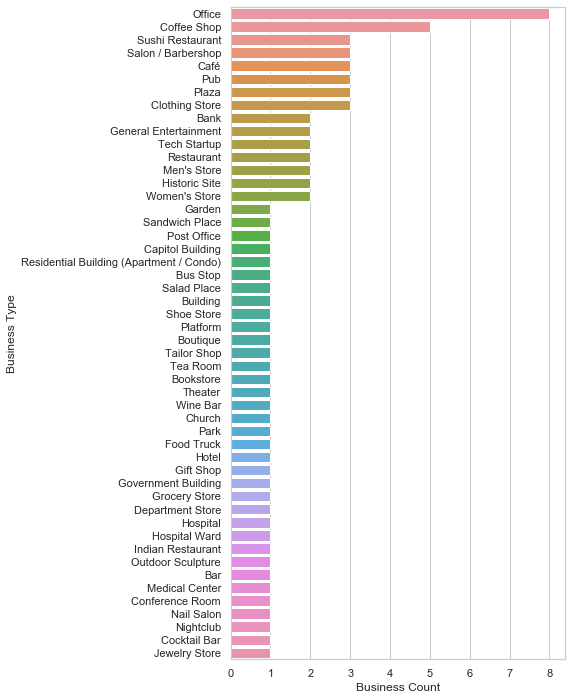

In [58]:
Cluster_3 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 2, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_3_count = pd.DataFrame(columns = columnNames)
Cluster_3_count['Business Type'] = pd.concat([Cluster_3['1st Most Common Venue'], Cluster_3['2nd Most Common Venue'], Cluster_3['3rd Most Common Venue'],
                                             Cluster_3['4th Most Common Venue'], Cluster_3['5th Most Common Venue'], Cluster_3['6th Most Common Venue'], 
                                             Cluster_3['7th Most Common Venue'], Cluster_3['8th Most Common Venue'], Cluster_3['9th Most Common Venue'], 
                                              Cluster_3['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_3_count['Business Count'] = 1
Cluster_3_count.shape


Cluster_3_count = Cluster_3_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_3_count = Cluster_3_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_3_count)


In [59]:
fig = ax.get_figure()

fig.savefig("LW_Search_Cluster_3.png", bbox_inches = 'tight')

In [60]:
LW_Search_Cluster_3 = set(Cluster_3['Neighborhood'])
print("Neighborhoods in Cluster 3 are: ", LW_Search_Cluster_3)

Neighborhoods in Cluster 3 are:  {'Oxford Street (west)', 'Mayfair (south), Piccadilly', 'Cornhill, Gracechurch Street, Lombard Street', 'Leicester Square, St. Giles', "St Paul's", 'Monument, Billingsgate', "Whitehall, Buckingham Palace, the Houses of Parliament and west of St James's", 'Whitechapel, Spitalfields, Shadwell, Limehouse, Stepney, Portsoken'}


In [61]:
# Cluster 4
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 3, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Hatton Garden,3,Jewelry Store,Office,Tech Startup,Building,Film Studio,Coffee Shop,Coworking Space,Food Truck,Whisky Bar,Café


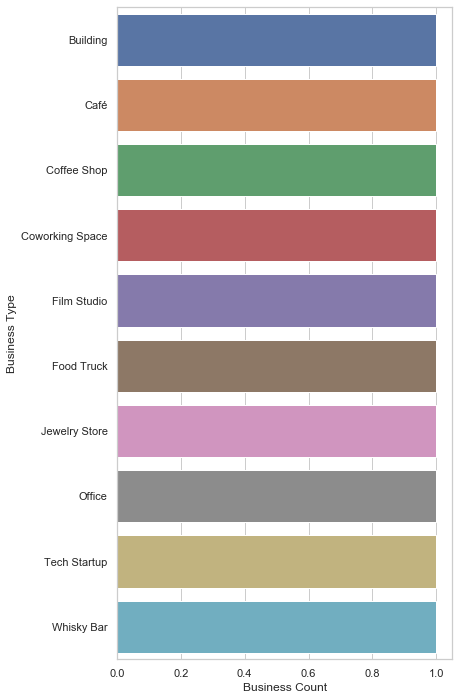

In [62]:
Cluster_4 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 3, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_4_count = pd.DataFrame(columns = columnNames)
Cluster_4_count['Business Type'] = pd.concat([Cluster_4['1st Most Common Venue'], Cluster_4['2nd Most Common Venue'], Cluster_4['3rd Most Common Venue'],
                                             Cluster_4['4th Most Common Venue'], Cluster_4['5th Most Common Venue'], Cluster_4['6th Most Common Venue'], 
                                             Cluster_4['7th Most Common Venue'], Cluster_4['8th Most Common Venue'], Cluster_4['9th Most Common Venue'], 
                                              Cluster_4['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_4_count['Business Count'] = 1
Cluster_4_count.shape


Cluster_4_count = Cluster_4_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_4_count = Cluster_4_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_4_count)


In [63]:
fig = ax.get_figure()

fig.savefig("LW_Search_Cluster_4.png", bbox_inches = 'tight')

In [64]:
LW_Search_Cluster_4 = set(Cluster_4['Neighborhood'])
print("Neighborhoods in Cluster 4 are: ", LW_Search_Cluster_4)

Neighborhoods in Cluster 4 are:  {'Hatton Garden'}


In [65]:
# Cluster 5
city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 4, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]]


,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
33,"Kilburn, Brondesbury, West Hampstead, Queen's ...",4,Office,Café,Salon / Barbershop,Residential Building (Apartment / Condo),Middle Eastern Restaurant,Platform,Elementary School,Event Space,Bus Stop,Laundry Service
34,"St John's Wood, Primrose Hill (south), Maryleb...",4,Café,Salon / Barbershop,Chinese Restaurant,Restaurant,Health & Beauty Service,Residential Building (Apartment / Condo),Italian Restaurant,Building,Office,Post Office
41,"Rest of Belgravia (north of Eaton Square), Kni...",4,Embassy / Consulate,Restaurant,Café,Hotel,Salon / Barbershop,Government Building,Lingerie Store,Office,Flower Shop,Building
43,"South Kensington district: South Kensington, K...",4,College Residence Hall,Residential Building (Apartment / Condo),Embassy / Consulate,Art Gallery,College Academic Building,University,College Classroom,College Engineering Building,Church,Café
44,"Portland Place, Regent Street",4,Medical Center,Doctor's Office,Dentist's Office,Hospital,Eye Doctor,Bus Stop,Building,Maternity Clinic,Park,Spa
46,"Soho (south east); Chinatown, Soho Square",4,Chinese Restaurant,Grocery Store,Bubble Tea Shop,Asian Restaurant,Café,Salon / Barbershop,Spa,Dim Sum Restaurant,Sandwich Place,Bakery
56,"Maida Hill district: Maida Hill, Maida Vale, L...",4,Café,Office,Residential Building (Apartment / Condo),Pub,Tech Startup,Building,Gym / Fitness Center,Boat or Ferry,Bar,Theater
57,"North Kensington, Kensal Town, Ladbroke Grove ...",4,Office,Residential Building (Apartment / Condo),Café,Building,Bus Stop,Grocery Store,Pub,Salon / Barbershop,Restaurant,Moroccan Restaurant


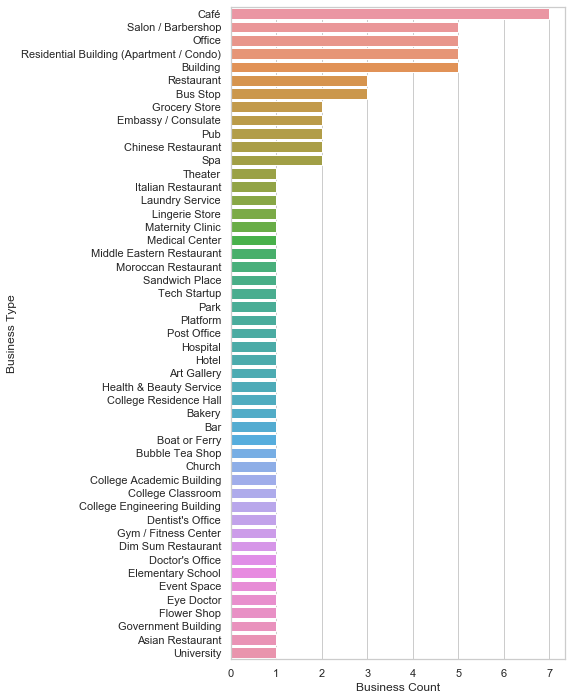

In [66]:
Cluster_5 = pd.DataFrame(city_of_london_venues_merged.loc[city_of_london_venues_merged['Cluster Labels'] == 4, city_of_london_venues_merged.columns[[2] + list(range(5, city_of_london_venues_merged.shape[1]))]])
columnNames = ['Business Type']

Cluster_5_count = pd.DataFrame(columns = columnNames)
Cluster_5_count['Business Type'] = pd.concat([Cluster_5['1st Most Common Venue'], Cluster_5['2nd Most Common Venue'], Cluster_5['3rd Most Common Venue'],
                                             Cluster_5['4th Most Common Venue'], Cluster_5['5th Most Common Venue'], Cluster_5['6th Most Common Venue'], 
                                             Cluster_5['7th Most Common Venue'], Cluster_5['8th Most Common Venue'], Cluster_5['9th Most Common Venue'], 
                                              Cluster_5['10th Most Common Venue']], axis =0, ignore_index =True)

Cluster_5_count['Business Count'] = 1
Cluster_5_count.shape


Cluster_5_count = Cluster_5_count.groupby(['Business Type'])['Business Count'].sum().reset_index()
Cluster_5_count = Cluster_5_count.sort_values(by=['Business Count'], ascending=False)

sns.set(style="whitegrid")
plt.subplots(figsize=(6, 12))
ax = sns.barplot(y = "Business Type", x = "Business Count", data=Cluster_5_count)


In [67]:
fig = ax.get_figure()

fig.savefig("LW_Search_Cluster_5.png", bbox_inches = 'tight')

In [68]:
LW_Search_Cluster_5 = set(Cluster_5['Neighborhood'])
print("Neighborhoods in Cluster 5 are: ", LW_Search_Cluster_5)

Neighborhoods in Cluster 5 are:  {'Rest of Belgravia (north of Eaton Square), Knightsbridge (eastern half) and Chelsea (a corner)', 'Soho (south east); Chinatown, Soho Square', 'South Kensington district: South Kensington, Knightsbridge (part)', 'Maida Hill district: Maida Hill, Maida Vale, Little Venice (part)', 'Portland Place, Regent Street', "St John's Wood, Primrose Hill (south), Marylebone (north), Lisson Grove (north)", "Kilburn, Brondesbury, West Hampstead, Queen's Park", "North Kensington, Kensal Town, Ladbroke Grove (north), Queen's Park (part)"}
